In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
%matplotlib inline

In [2]:
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The sixth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [3]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

In [4]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    'brain tumor/train/',
    target_size = (300,300),
    batch_size = 10,
    class_mode = 'binary'
)

Found 176 images belonging to 2 classes.


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 25
)

Epoch 1/25
10/10 [==============================] - 3s 287ms/step - loss: 0.4880 - accuracy: 0.7708
Epoch 2/25
10/10 [==============================] - 3s 305ms/step - loss: 0.5186 - accuracy: 0.7600
Epoch 3/25
10/10 [==============================] - 3s 327ms/step - loss: 0.4370 - accuracy: 0.8229
Epoch 4/25
10/10 [==============================] - 3s 293ms/step - loss: 0.4602 - accuracy: 0.8000
Epoch 5/25
10/10 [==============================] - 3s 281ms/step - loss: 0.4000 - accuracy: 0.8438
Epoch 6/25
10/10 [==============================] - 3s 272ms/step - loss: 0.3056 - accuracy: 0.8646
Epoch 7/25
10/10 [==============================] - 3s 303ms/step - loss: 0.3186 - accuracy: 0.8700
Epoch 8/25
10/10 [==============================] - 3s 290ms/step - loss: 0.2104 - accuracy: 0.9271
Epoch 9/25
10/10 [==============================] - 3s 302ms/step - loss: 0.2637 - accuracy: 0.9200
Epoch 10/25
10/10 [==============================] - 3s 309ms/step - loss: 0.2351 - accuracy: 0.9400

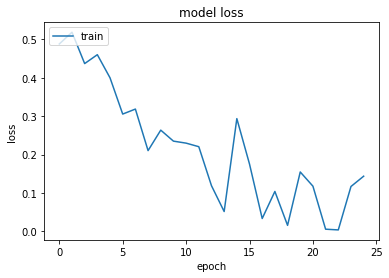

In [10]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
    'brain tumor/test/',
    target_size = (300, 300),
    batch_size = 10, 
    class_mode = 'binary'
)

Found 77 images belonging to 2 classes.


In [13]:
eval_result = model.evaluate_generator(test_generator, 77)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
loss rate at evaluation data : 2.60017728805542
accuracy rate at evaluation data : 0.7662337422370911


In [14]:
model_json = model.to_json()
with open("braintumor_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("braintumor_model.h5")
print("Saved model to disk")

Saved model to disk
